#  At a Foreign Relations Committee Event in 2012, John Kerry said "If continued ... it would bring ' more insecurity, more violence ... and ultimately the degradation of stability of whole regions." This is data from a Forest Elephant Telemetry Programme from 1998 to 2007: https://www.movebank.org/cms/webapp?gwt_fragment=page=studies,path=study1818825

In [110]:
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
import chart_studio.plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import geopandas as gv
init_notebook_mode(connected=True)
%matplotlib inline
sns.set(rc={'figure.figsize':(12,10)})
import pandas as pd
pd.pandas.set_option('display.max_columns', None)
import warnings
warnings.simplefilter(action='ignore')
df = pd.read_csv('Forest Elephant Telemetry Programme.csv')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37052 entries, 0 to 37051
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   event-id                         37052 non-null  int64  
 1   visible                          37052 non-null  bool   
 2   timestamp                        37052 non-null  object 
 3   location-long                    36530 non-null  float64
 4   location-lat                     36530 non-null  float64
 5   comments                         34448 non-null  float64
 6   sensor-type                      37052 non-null  object 
 7   individual-taxon-canonical-name  37048 non-null  object 
 8   tag-local-identifier             37052 non-null  object 
 9   individual-local-identifier      37048 non-null  object 
 10  study-name                       37052 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(6)
memory usage: 2.9+ MB


In [112]:
df.isnull().sum()

event-id                              0
visible                               0
timestamp                             0
location-long                       522
location-lat                        522
comments                           2604
sensor-type                           0
individual-taxon-canonical-name       4
tag-local-identifier                  0
individual-local-identifier           4
study-name                            0
dtype: int64

# There are two species of elephants for this study: the African forest-dwelling elephant(Loxodonta cyclotis) and the African savannah elephant(Loxodonta africana).

In [113]:
df['individual-taxon-canonical-name'].value_counts()

Loxodonta africana    35391
Loxodonta cyclotis     1657
Name: individual-taxon-canonical-name, dtype: int64

In [114]:
df['visible'].value_counts()

True    37052
Name: visible, dtype: int64

In [115]:
## There are 34 unique gps tags
df['individual-local-identifier'].unique()

array(['00055877VTIC596', '00056243VTI84BC', '9D', '9A',
       '00039576VTI5335', '134', '133', '00055871VTIAD78', '131',
       '00055882VTI59AF', 'BC', '00039561VTI96EA', '00056231VTI5480',
       '132', '00056235VTI6494', '130', '00056236VTIE899', '4D', '135',
       '40012', '00038386VTIA3F7', '136', '00055879VTICDA0', '99',
       '39062', '00055894VTI89EB', '00055896VTI91F5', '40013',
       '00039109VTI7E16', '00039372VTI1F39', 'Sharon', nan, 'Mossimbo',
       'Mwasi a Mossimbo', 'Madame Nguende'], dtype=object)

In [116]:
df['individual-local-identifier'].value_counts()

134                 5686
133                 4315
99                  2173
131                 2112
BC                  1913
9A                  1836
136                 1727
00055879VTICDA0     1633
00055877VTIC596     1585
132                 1241
130                 1236
00055896VTI91F5     1165
9D                  1072
135                 1043
00055894VTI89EB      961
00038386VTIA3F7      839
00055882VTI59AF      817
00055871VTIAD78      541
00039372VTI1F39      532
00039576VTI5335      522
00056236VTIE899      504
Madame Nguende       484
00039109VTI7E16      481
Sharon               447
00056243VTI84BC      439
Mwasi a Mossimbo     419
Mossimbo             307
00056235VTI6494      213
39062                210
00039561VTI96EA      188
00056231VTI5480      167
40012                112
40013                 72
4D                    56
Name: individual-local-identifier, dtype: int64

In [117]:
df['timestamp'].unique()

array(['2003-11-25 11:36:13.000', '2003-11-26 11:37:04.000',
       '2003-11-28 10:59:03.000', ..., '2007-12-02 17:41:00.000',
       '2007-12-03 14:19:00.000', '2007-12-03 22:19:00.000'], dtype=object)

In [118]:
df['timestamp'] = df['timestamp'].str.strip('')

In [119]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [120]:
df['year'] = df['timestamp'].dt.year

In [121]:
df['year'].value_counts()

2004    16109
2003     6455
2001     5984
2005     5623
2007     1661
2000      727
2002      283
2006      154
1998       56
Name: year, dtype: int64

# The dataframe does not start with the earliest years so I filtered out those years into seperate dataframes and checked the shape of them.

In [122]:
missing_years98 = df[df['year'] == 1998]
missing_years99 = df[df['year'] == 1999]
missing_years01 = df[df['year'] == 2001]


In [123]:
print('missing_years98 shape:',missing_years98.shape)
print('missing_years99 shape:',missing_years99.shape)
print('missing_years01 shape:',missing_years01.shape)

missing_years98 shape: (56, 12)
missing_years99 shape: (0, 12)
missing_years01 shape: (5984, 12)


<AxesSubplot:ylabel='Density'>

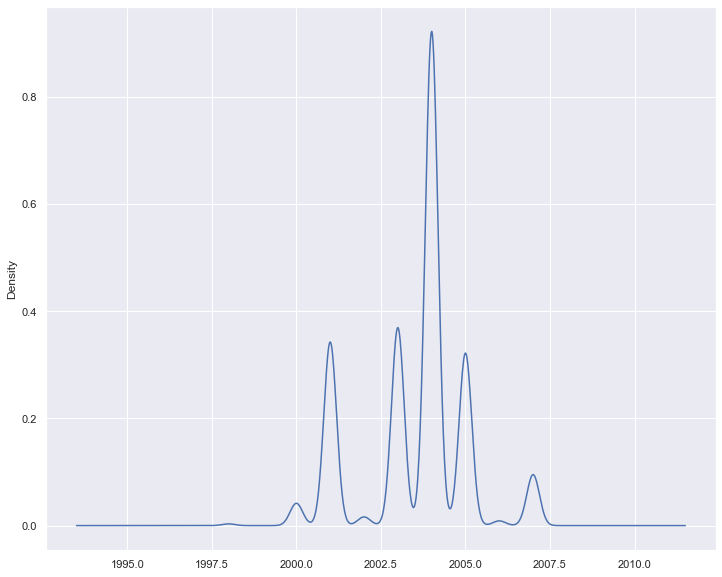

In [124]:
#It looks like 2004 had the most event counts which is also verified from the value counts above
df.year.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

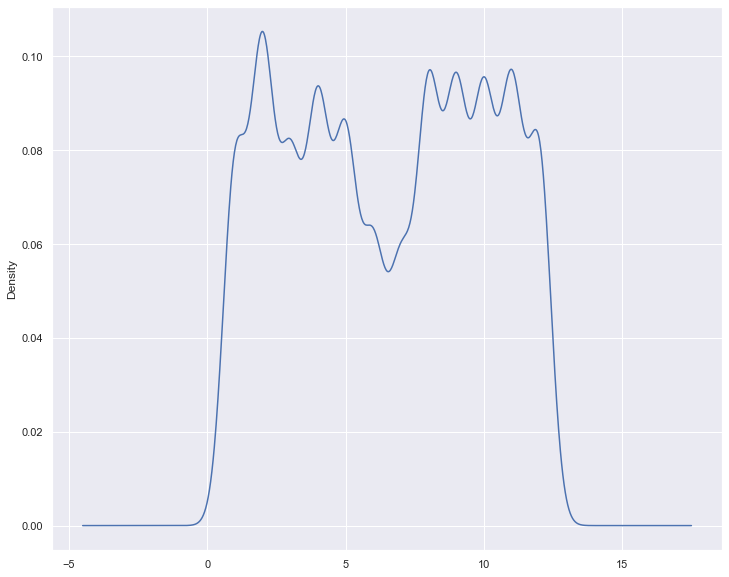

In [125]:
df['month'] = df['timestamp'].dt.month
df['month'].plot(kind='kde')

# The data came from Gabon, Republic of Congo, and a little spillover in the CAR. The Seleka militia group in CAR is the most commonly cited group related to ivory-funded conflict. Seleka formed in CAR in 2012 after a long-term government abandonment of the muslim north of the country. The Central African Republic is one of the last strongholds for the forest elephant.

In [126]:

fig = go.Figure(data=go.Scattergeo(
        lon = df['location-long'],
        lat = df['location-lat'],
        text= df['timestamp'],
        mode = 'markers',
        marker_color = 'red',
        ))
fig.update_layout(
        title = 'Events from 1998 through 2008',
        geo_scope='africa',
    )

In [127]:
import plotly.io as pio
pio.write_html(fig, 'movements.html')

# These next few scatterplots can help identify the home range of the two species, if the home range is shrinking, the territories of certain individuals, it can help with reserve mangement, conservation and anti-poaching plans and better allocation of funding.

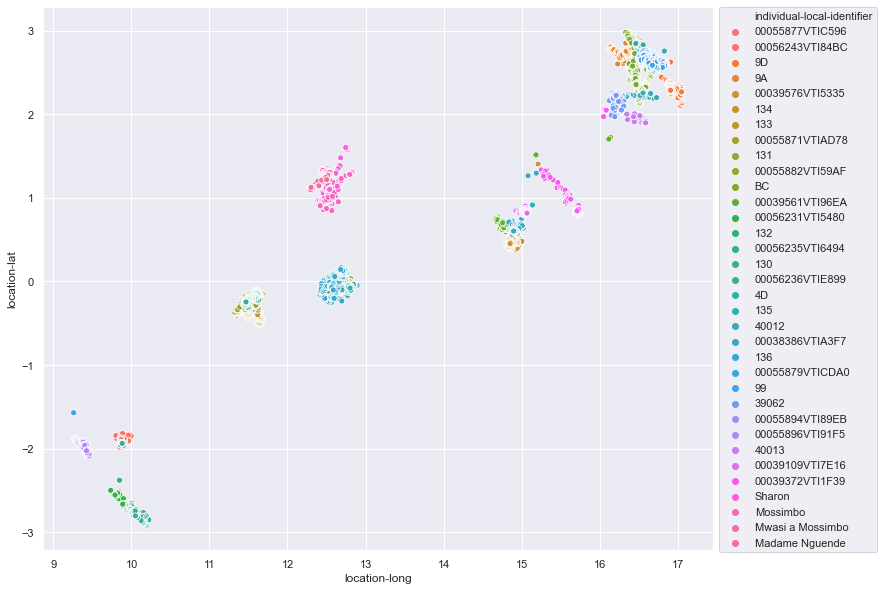

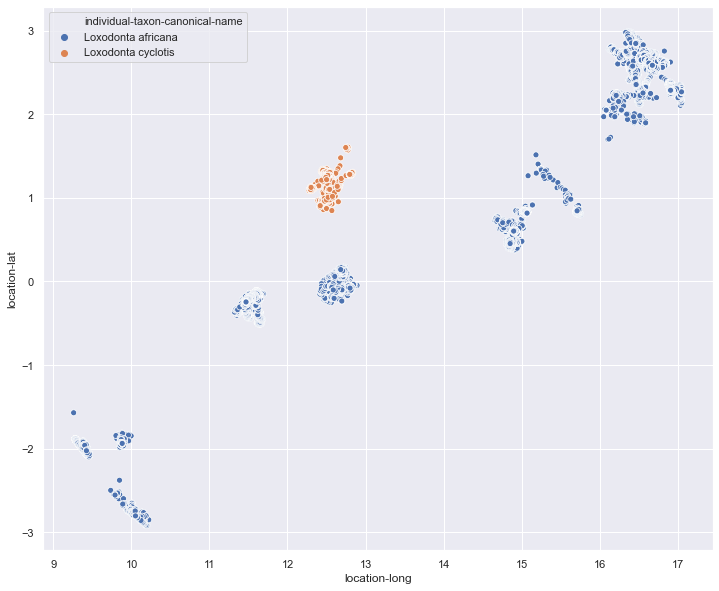

In [128]:
sns.scatterplot('location-long', 'location-lat', hue=df['individual-local-identifier'], data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()
sns.scatterplot('location-long', 'location-lat', hue=df['individual-taxon-canonical-name'], data=df)
plt.show()

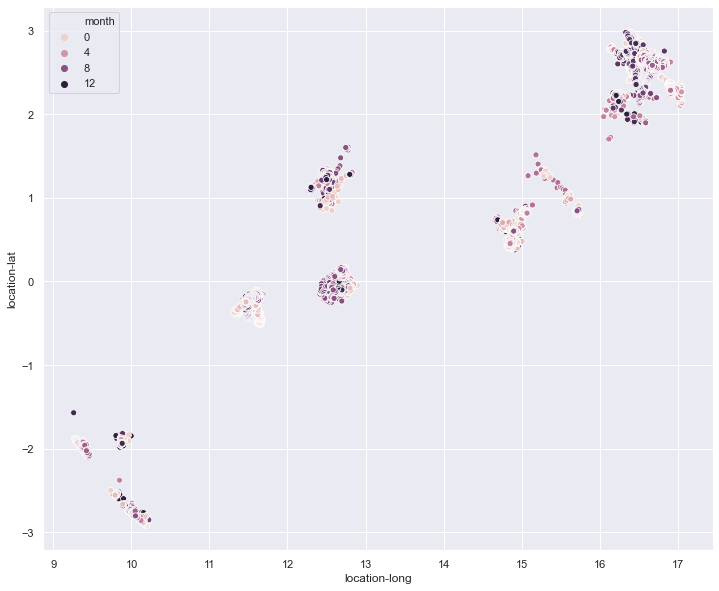

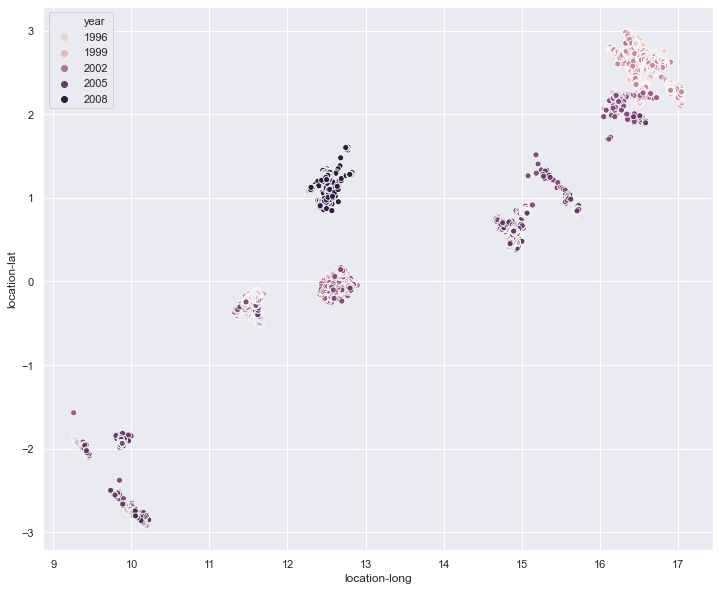

In [129]:
sns.scatterplot('location-long', 'location-lat', hue=df['month'], data=df)
plt.show()
sns.scatterplot('location-long', 'location-lat', hue=df['year'], data=df)
plt.show()

In [130]:
## Dropping all null values for the k-means algorithm
coordinates = df[['location-long', 'location-lat','year']]

In [131]:
coordinates.dropna(inplace=True)

In [132]:
import sklearn
from sklearn.cluster import KMeans

In [133]:
#Assigns data points to the closest centroid using the Euclidean distance
#Euclidean distance - sqrt(x - a)^2 + (y-b)^2
#Measures the distance of point to the orgigin
#n_init - Number of time the k-means algorithm will be run with different centroid seeds.
#max_iter - Maximum number of iterations of the k-means algorithm for a single run
km = KMeans(n_init=300, max_iter =200)
preds = km.fit_predict(coordinates)
coordinates['preds'] = preds

<AxesSubplot:xlabel='location-long', ylabel='location-lat'>

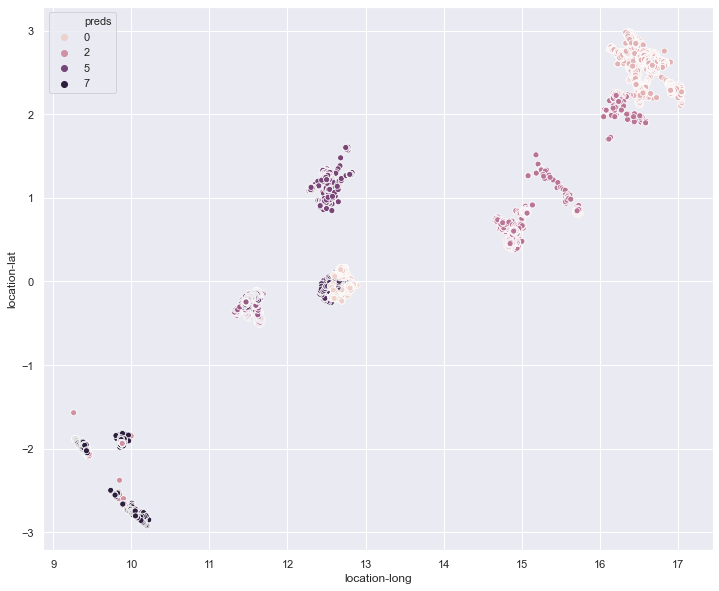

In [134]:
sns.scatterplot('location-long', 'location-lat', hue=coordinates['preds'], data=coordinates)

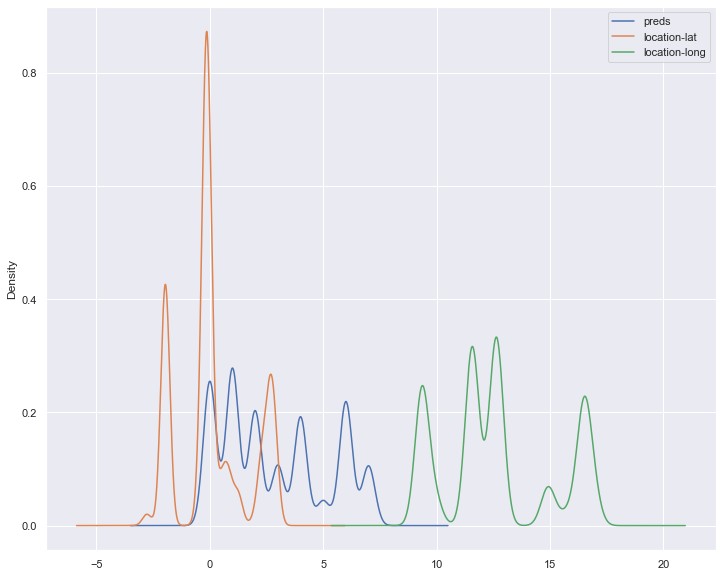

In [135]:
coordinates['preds'].plot(kind='kde')
coordinates['location-lat'].plot(kind='kde')
coordinates['location-long'].plot(kind='kde')
plt.legend()

In [136]:
coordinates

location-long  location-lat  year  preds
0           9.343933     -1.911700  2003      2
1           9.326150     -1.911650  2003      2
2           9.343483     -1.949067  2003      2
3           9.326967     -1.917467  2003      2
4           9.291800     -1.902433  2003      2
...              ...           ...   ...    ...
37047      12.303833      1.093517  2007      5
37048      12.295533      1.099100  2007      5
37049      12.501200      1.218383  2007      5
37050      12.299750      1.131383  2007      5
37051      12.302500      1.125550  2007      5

[36530 rows x 4 columns]

In [137]:
coordinates['preds'].value_counts()

1    7237
0    6638
6    5712
2    5281
4    5010
3    2769
7    2744
5    1139
Name: preds, dtype: int64

In [138]:
cluster1 = coordinates[coordinates['preds'] == 1]
cluster2 = coordinates[coordinates['preds'] == 2]
cluster3 = coordinates[coordinates['preds'] == 3]
cluster4 = coordinates[coordinates['preds'] == 4]
cluster5 = coordinates[coordinates['preds'] == 5]
cluster6 = coordinates[coordinates['preds'] == 6]
cluster7 = coordinates[coordinates['preds'] == 7]

In [139]:
print('Cluster1 variance:', cluster1.std().sum())
print('Cluster2 variance:', cluster2.std().sum())
print('Cluster3 variance:', cluster3.std().sum())
print('Cluster4 variance:', cluster4.std().sum())
print('Cluster5 variance:', cluster5.std().sum())
print('Cluster6 variance:', cluster6.std().sum())
print('Cluster7 variance:', cluster7.std().sum())

Cluster1 variance: 0.9729897481965001
Cluster2 variance: 0.5754656353303295
Cluster3 variance: 1.4200995721285623
Cluster4 variance: 0.3338962568071083
Cluster5 variance: 0.2725603853120075
Cluster6 variance: 0.6200960803527168
Cluster7 variance: 0.7749702661238297


In [140]:
import plotly.express as px
fig = px.scatter_3d(coordinates, x='location-long', y='location-lat', z='year',
                   color='preds')
fig.show()

In [142]:
#writer = pd.ExcelWriter('forest_elephants.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
#df.to_excel(writer, sheet_name='Sheet1')
#coordinates.to_excel(writer, sheet_name='Sheet2')


# Close the Pandas Excel writer and output the Excel file.
#writer.save()